In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)

import warnings
warnings.filterwarnings('ignore')

# k Nearest Neighbors (kNN)
Метод k ближайших соседей рассчитывает расстояния от нового объекта до всех объектов выборки и, отбирая k ближайших, предсказывает целевую переменную с помощью голосования (в случае классификации) или усреднения (в случае регрессии). \
При этом этот метод можно по-разному настраивать, например можно изменить способ подсчета расстояний или способ взвешивания соседей по расстоянию. \
Для начала скачаем датасет и визуализируем данные.

In [3]:
circ = pd.read_csv('concertriccir2.csv')
circ.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


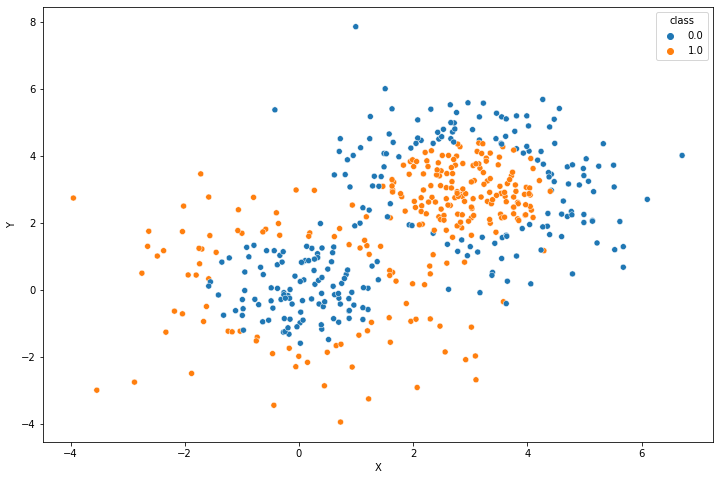

In [4]:
sns.scatterplot(circ['X'], circ['Y'], hue=circ['class']);

**Задание 1.** Обучите логистическую регрессию на данных и нарисуйте разделяющую гиперплоскость (прямую) на рисунке с данными. Как линейный классификатор справился с задачей? Сделайте вывод исходя из геометрии данных и линии разделения. Какой accuracy выйдет на всей выборке (без валидации)?

In [5]:
from sklearn.linear_model import LogisticRegression

### Your code is here
model = LogisticRegression()
model.fit(circ.drop(columns=['class']), circ['class'])

model.intercept_, model.coef_

(array([0.0284847]), array([[-0.00316169, -0.01204832]]))

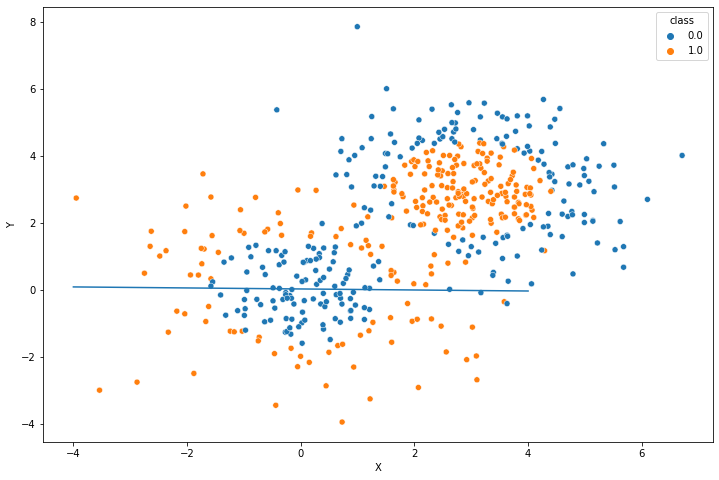

In [8]:
x, y = np.linspace(-4, 4, 100), np.linspace(-4, 4, 100)
z = model.intercept_ + model.coef_[0][0] * x + model.coef_[0][1] * y

sns.lineplot(x=x, y=z)
sns.scatterplot(circ['X'], circ['Y'], hue=circ['class']);

In [12]:
model.score(circ.drop(columns=['class']), circ['class'])

0.424

**Задание 2.** Разделите обучающую выборку и обучите 6 моделей kNN с различным числом соседей из `all_k`, сохраните обученные классификаторы в список. \
Выведите accuracy на тренировочной и тестовой выборке для каждой модели. Каково оптимальное число соседей с точки зрения accuracy?

In [13]:
X = circ[['X', 'Y']].values
y = circ['class'].values.astype('int')

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm
all_k = [1, 3, 10, 30, 40, 60]

models, accuracies = [], []
### Your code is here
for k in tqdm(all_k):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    
    score = model.score(X_test, y_test)
    models.append(model)
    accuracies.append(score)

100%|██████████| 6/6 [00:00<00:00, 269.27it/s]


In [16]:
accuracies

[0.89, 0.87, 0.85, 0.74, 0.75, 0.73]

**Задание 3.** (бонусное) Скачайте библиотку [mlxtend](http://rasbt.github.io/mlxtend/#examples) для визуализации решающих поверхностей. 
В документации можно ознакомиться с [примерами](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) изображения решающих поверхностей для различных моделей. \
Построим несколько таких графиков для шести обученных нами kNN.

1. Подберите параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
2. Удобно перед визулизацией сохранить обученные классификаторы в список `all_clfs`.
3. Проявите терпение! Отрисовка решающих поверхностей может занимать пару минут.

In [19]:
import mlxtend
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

0 0 0
1 0 1
2 1 0
3 1 1
4 2 0
5 2 1


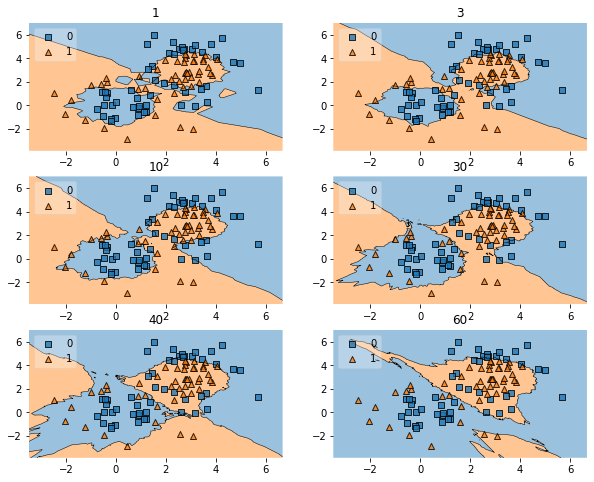

In [33]:
### Your code is here
gs = gridspec.GridSpec(3, 2)

fig = plt.figure(figsize=(10,8))

labels = all_k
for i, (clf, lab) in enumerate(zip(models,labels)):

    ax = plt.subplot(gs[i//2, i%2])
    fig = plot_decision_regions(X=X_test, y=y_test, clf=clf, legend=2)
    plt.title(lab)

plt.show()

1. Как меняется решающая поверхность с ростом числа соседей?
2. Какое оптимальное число соседей с точки зрения устройства данных и геометрии решающих поверхностей? Поясните свой ответ, опираясь на полученные графики.
3. Лучше ли справляется kNN по сравнению с логистической регрессией?

**Задание 4.** Скачайте уже известный вам датасет [SigmaCabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). Обучите классификатор kNN на отнормированных и не отнормированных данных, подобрав лучшие гиперпараметры среди $k \in [1, 5, 10]$. Замерьте качество на тестовой выборке. \
Почему нормирование данных помогает улучшить качество?

In [34]:
df = pd.read_csv('processed_sigma_cabs.csv')
df.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_B,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,2,1,...,0,0,0,0,0,0,0,0,0,0
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2,1,...,0,0,0,0,0,0,0,0,0,1
2,41.58,10.0,2.79805,3.50125,2,61.0,56,77,2,1,...,0,0,0,0,0,0,0,0,0,1
3,61.56,10.0,2.79805,3.45375,0,61.0,52,74,3,0,...,0,0,0,0,0,0,0,0,0,1
4,54.95,10.0,3.03453,3.40250,4,51.0,49,102,2,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
X = df.drop('Surge_Pricing_Type', axis=1)
y = df['Surge_Pricing_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [36]:
### Your code is here
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
all_k = [1, 5, 10]

pipe_scores, model_scores = [], []
for k in all_k:
    # normalized data
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', KNeighborsClassifier(n_neighbors=k))
    ])
    pipe.fit(X_train, y_train)
    pipe_scores.append(pipe.score(X_test, y_test))
    
    
    # non-normalized data
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    model_scores.append(model.score(X_test, y_test))


In [37]:
pipe_scores, model_scores

([0.5648805681084571, 0.6303877264269168, 0.6607678578209851],
 [0.43819542019519236, 0.44317016671097104, 0.4703603843086621])

**Задание 5.** Обучите классификатор kNN на отнормированных данных с помощью метрики Минковского. 
$$
\rho(x, z) = \bigg(\sum_i |x_i - z_i|^p\bigg) ^{1/p}
$$

Значение параметра `p` возьмите равным единице. Замерьте качество на тестовой выборке и сравните с предыдущим заданием, где `p = 2`.

In [40]:
### Your code is here
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier(p=1, n_neighbors=10))
])

pipe.fit(X_train, y_train)

round(pipe.score(X_test, y_test), 3)

0.661

**Задание 6.** Скачайте датасет [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices), в котором мы будем предсказывать среднюю стоимость жилья. В качестве признаков будем использовать `['longitude', 'latitude']`, посмотрите на них с помощью scatterplot. \
По какой характеристике наш kNN регрессор в этом случае подбирает соседей?

1. Обучите обыкновенную линейную регрессию и замерьте RMSE на тренировочной и тестовой выборках.
2. Обучите kNN регрессор на отнормированных данных, подобрав лучшие гиперпараметры $k \in [1, 2, ..., 9]$. 
3. Обучите kNN регрессор с гауссовским ядром, взяв параметр k из предыдущего пункта и подобрав оптимальное значение ширины окна среди предложенных $h \in np.arange(0.02, 0.1, 0.01)$.

Как ширина окна влияет на веса при усреднении ответа по соседям? 

In [41]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


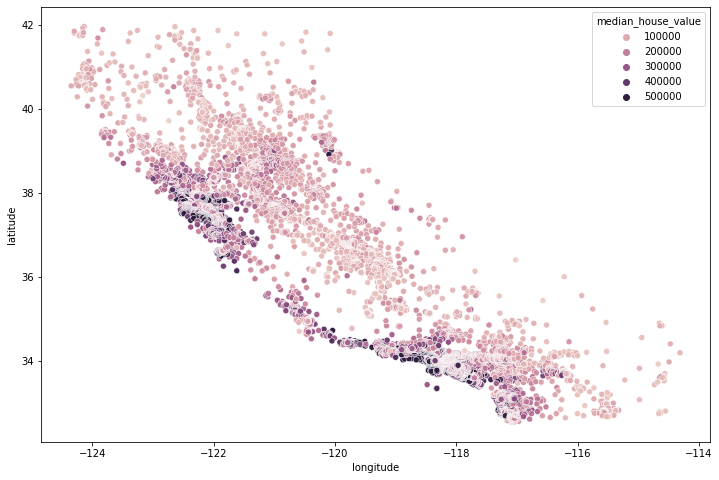

In [42]:
X = df[['longitude', 'latitude']]
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)
sns.scatterplot('longitude', 'latitude', data=X, hue=y);

In [55]:
### Your code is here
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import root_mean_squared_error as rmse

def rmse(pred, true):
    return ((pred - true)**2).mean()**0.5

model1 = LinearRegression()
model1.fit(X_train, y_train)
print(f"1: train: {rmse(y_train, model1.predict(X_train))}, test {rmse(y_test, model1.predict(X_test)):.3f}")


param_grid = {'kNN__n_neighbors': [i for i in range(1, 10)]}
pipe2 = Pipeline([
    ('scaler', StandardScaler()),
    ('kNN', KNeighborsClassifier())
])
grid2 = GridSearchCV(pipe2, param_grid)
grid2.fit(X_train, y_train)
print(f"2: train: {rmse(y_train, grid2.predict(X_train))}, test {rmse(y_test, grid2.predict(X_test)):.3f}")
print(f"Best params: {grid.best_params_}\n")

hs = np.arange(0.02, 0.1, 0.01)
train_scores, test_scores = [], []
for h in hs:
    def kernel(distances, h=h):
        const = 1 / (np.sqrt(2 * np.pi))
        power = (-1/2) * ((distances)**2) / h**2
        return const * np.exp(power)

    pipe3 = Pipeline([
        ('scaler', StandardScaler()),
        ('kNN', KNeighborsClassifier(n_neighbors=9, weights=kernel))
    ])
    pipe3.fit(X_train, y_train)
    train_scores.append(rmse(y_train, pipe3.predict(X_train)))
    test_scores.append(rmse(y_test, pipe3.predict(X_test)))
print(f"3: train: {max(train_scores):.3f}, test {max(test_scores):.3f}")
print(f"3: Best params: {hs[test_scores.index(max(test_scores))]}\n")

1: train: 100948.39976676, test 98369.877
2: train: 80952.16829314615, test 86313.094

Best params: {'kNN__n_neighbors': 9}
3: train: 44754.891, test 68164.209
3: Best params: 0.09



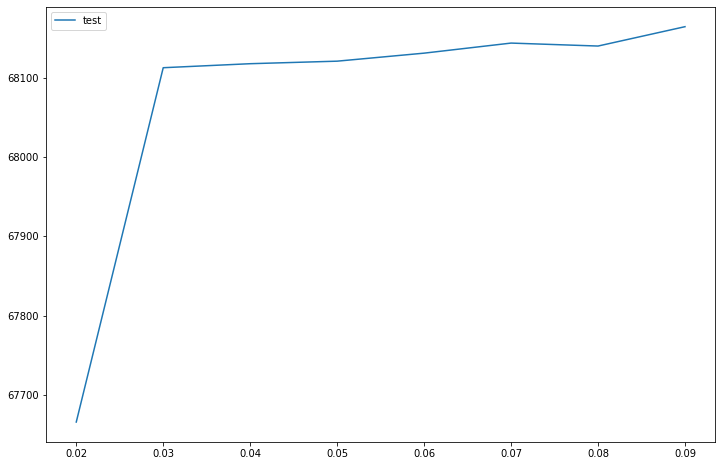

In [58]:
plt.plot(hs, test_scores, label='test')
# plt.plot(hs, train_scores, label='train')

plt.legend()